In [1]:
# Hierarchical Clustering

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [3]:
# Importing the dataset#
#уменьшим выборку до 500 элементов
df = pd.read_csv('listings_prepar.csv')
df = df[:500]
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,831.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,1247.0,0.0,0.0,1.0,0.0,17.0
2,64.0,1.0,301.0,890.0,1.0,0.0,0.0,0.0,115.0
3,8.0,1.0,0.0,1658.0,0.0,0.0,1.0,0.0,54.0
4,38.0,3.0,337.0,890.0,1.0,0.0,0.0,0.0,90.0
...,...,...,...,...,...,...,...,...,...
495,18.0,1.0,65.0,840.0,1.0,0.0,0.0,0.0,80.0
496,1.0,8.0,288.0,1203.0,0.0,0.0,1.0,0.0,125.0
497,38.0,3.0,60.0,931.0,0.0,0.0,1.0,0.0,40.0
498,36.0,3.0,364.0,918.0,1.0,0.0,0.0,0.0,45.0


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = 
['number_of_reviews','calculated_host_listings_count','availability_365',
 'datetime_diff','room_type=0','room_type=1','room_type=2',
 'room_type=3','price']).round()

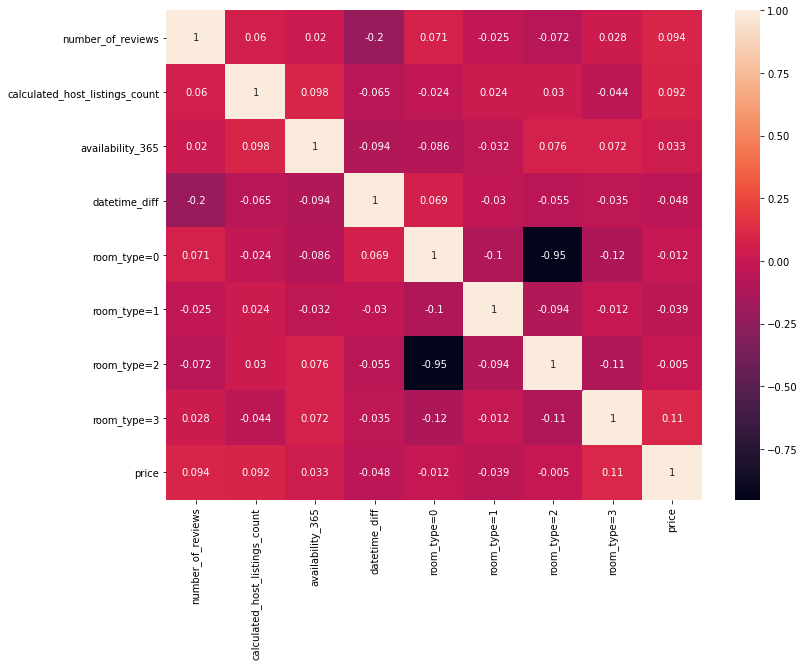

In [5]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

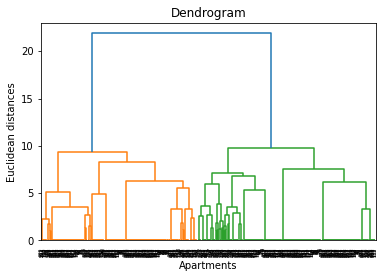

In [6]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Apartments')
plt.ylabel('Euclidean distances')
plt.show()

In [7]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [8]:
# Less features
X = df.iloc[:, [4, 6]]

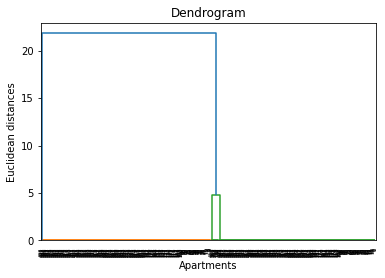

In [9]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Apartments')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
# K-Means Clustering

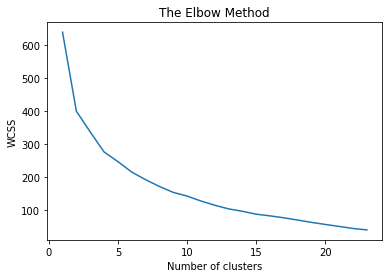

In [11]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 24):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 24), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

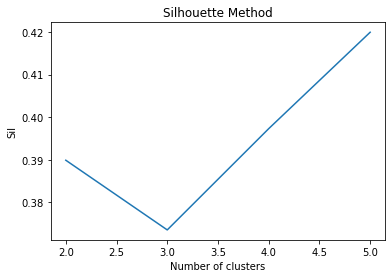

2:0.3898668854119005
3:0.3734781856420247
4:0.39728908073216623
5:0.41996502966989946


In [12]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [13]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['number_of_reviews','calculated_host_listings_count','availability_365',
 'datetime_diff','room_type=0','room_type=1','room_type=2',
 'room_type=3','price']).round()

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,0.0,0.0,1.0,0.0,-0.0,0.0,1.0,-0.0,0.0
1,1.0,0.0,1.0,-0.0,1.0,0.0,0.0,0.0,0.0
2,-0.0,0.0,1.0,0.0,1.0,0.0,-0.0,0.0,0.0


In [14]:
# Less features
X = df.iloc[:, [ 4, 6]]

In [15]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['room_type=0','room_type=2']).round()

,room_type=0,room_type=2
0,1.0,0.0
1,0.0,1.0
2,0.0,0.0


In [16]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.5204308566724959

In [17]:
#видим, что при оптимальных количеством кластеров является 3. Они не особо характерны и не имеют каких-то характерных особенностей
#в основном это типизация по типу жилья
#тем не менее, качество кластеризации имеет хоть какое-то качество распределения по группам.



In [ ]:
#логично, что тип комнаты 0 самый большой и имеет сразу два кластера, между которыми особо нет различия,
#что может говорить о том, Что оптимальным решением могло стать и создание двух кластеров 